# Clasificacion de Imagenes Mediante Red Neural Convolucional

La convolucion es una tecnica de tratamiento de matrices que representan imagenes: [Convolucion](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

Estan representadas en los articulos academicos de forma esquematica, generalemente como capas en las redes neuronoales de reconocimiento y clasificacion de imagenes:
[Articulo](https://arxiv.org/pdf/1512.07108.pdfã€‚)

Vamos a realizar un ejemplo simple de clasificacion de imagenes con aumentacion de datos usando Tensorflow. Tensorflow es una biblioteca para aprendizaje profundo de codigo abierto desarrollada por Google.

Vamos a necesitar las siguientes herramientas:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Clasificaremos imagenes de flores que se encuentran en la siguiente direccion:

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


Por defecto, la herramienta de keras de descarga de archivos los descarga en la siguiente direccion:

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

Los contenidos de este directorio son:

In [ ]:
os.listdir(data_dir)

['dandelion', 'roses', 'sunflowers', 'tulips', 'LICENSE.txt', 'daisy']

Comprobamos que tenemos las imagenes:

In [ ]:
total_imagenes = len(list(data_dir.glob('*/*.jpg')))
print(f'Tenemos {total_imagenes} en total.')

Tenemos 3670 en total.


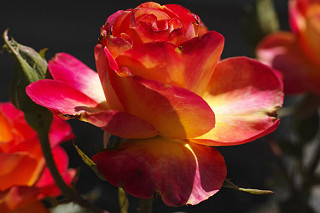

In [ ]:
rosas = list(data_dir.glob('roses/*'))
PIL.Image.open(str(rosas[125]))

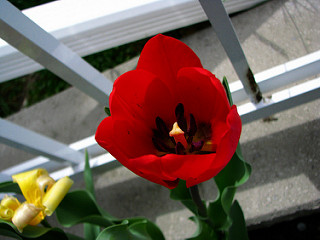

In [ ]:
tulipanes = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulipanes[1]))

In [ ]:
imagen = PIL.Image.open(str(tulipanes[1]))

In [ ]:
imagen.size

(320, 240)

Ahora que tenemos las imagenes en un conjunto de directorios necesitamos generar un cargador, una utilidad que pase las imagenes a nuestro modelo de aprendizaje de forma automatica y organizada:

In [ ]:
# Cuantas imagenes cargar en cada lote:
tamaño_lote = 32
# Las imagenes pueden ser de diferentes tamaños.
# Nuestros modelos generalmente solo podran trabajar
# con un tamaño de entrada de imagen. Forzamos a nuestro
# cargador a cargar las imagenes siempre en un mismo tamaño:
altura_img = 180
anchura_img = 180

Separamos nuestras imagenes en dos grupos, el grupo de entrenamiento y el grupo de validacion. Utilizamos una separacion de 80-20 inicialmente:

In [ ]:
datos_entrenamiento = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(altura_img, anchura_img),
  batch_size=tamaño_lote)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
datos_validacion = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(altura_img, anchura_img),
  batch_size=tamaño_lote)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Los nombres de las clases estan en el atributo "class_names" de los conjuntos de datos:

In [ ]:
nombre_clases = datos_entrenamiento.class_names
print(nombre_clases)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Generamos una visualizacion para comprobar nuestras imagenes:

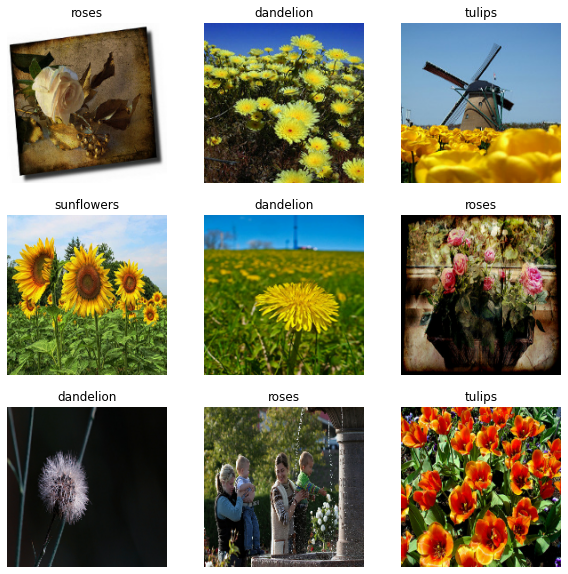

In [ ]:
plt.figure(figsize=(10, 10))
for imagenes, etiqueta in datos_entrenamiento.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imagenes[i].numpy().astype("uint8"))
    plt.title(nombre_clases[etiqueta[i]])
    plt.axis("off")

Cada lote de imagenes esta representado por un tensor de tamaño 32x180x180x3. Numero de imagenes, altura de cada imagen, anchura de cada imagen y tres canales de color:

In [ ]:
for lote_imagenes, lote_etiquetas in datos_entrenamiento:
  print(lote_imagenes.shape)
  print(lote_etiquetas.shape)
  break

(32, 180, 180, 3)
(32,)


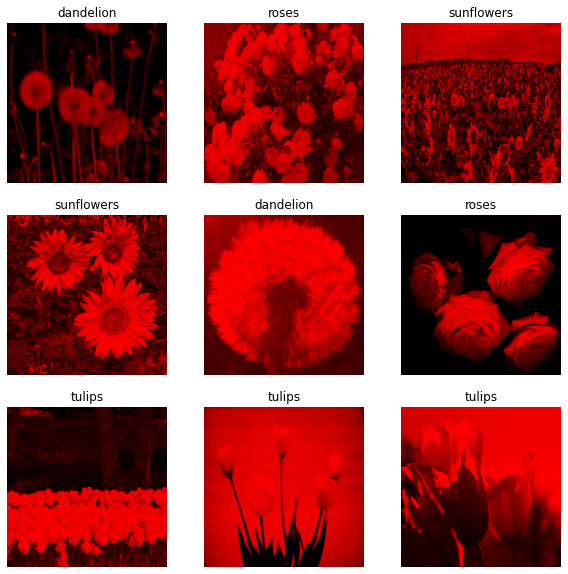

In [ ]:
plt.figure(figsize=(10, 10))
for imagenes, etiqueta in datos_entrenamiento.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    canal_color = imagenes[i].numpy().astype("uint8")
    # La imagen esta en formato RGB:
    # Red - Green - Blue
    # Hacemos 0 en Green y Blue:    
    canal_color[:, :, 1] = 0
    canal_color[:, :, 2] = 0
    
    plt.imshow(canal_color)
    plt.title(nombre_clases[etiqueta[i]])
    plt.axis("off")

Una imagen, en formato matricial, es esto:

In [ ]:
imagenes[i].numpy().astype("uint8")

array([[[212, 238, 251],
        [212, 238, 251],
        [211, 237, 250],
        ...,
        [239, 248, 253],
        [238, 247, 252],
        [239, 248, 253]],

       [[212, 238, 251],
        [212, 238, 251],
        [212, 238, 251],
        ...,
        [239, 248, 253],
        [239, 248, 253],
        [239, 248, 253]],

       [[212, 239, 252],
        [211, 238, 251],
        [211, 237, 250],
        ...,
        [239, 248, 253],
        [239, 248, 253],
        [239, 248, 253]],

       ...,

       [[ 25,  22,  11],
        [ 22,  13,   9],
        [ 22,   7,   7],
        ...,
        [ 28,  32,  26],
        [ 27,  32,  30],
        [ 24,  30,  30]],

       [[ 37,  42,  27],
        [ 28,  25,  14],
        [ 22,  13,   7],
        ...,
        [ 27,  32,  25],
        [ 26,  31,  31],
        [ 24,  29,  31]],

       [[ 48,  62,  41],
        [ 43,  48,  32],
        [ 30,  29,  18],
        ...,
        [ 25,  30,  24],
        [ 25,  29,  31],
        [ 21,  28,  30]]

El cargador de datos (dataloader) puede, entre otras capacidades, precargar los datos de disco en memoria para minimizar los bloqueos de lectura. Cache mantiene los datos de las imagenes en memoria despues de la primera pasada de entrenamiento (recordamos aqui el modelo de la neurona de regresion) y prefetch solapa el proceso de carga al proceso de entranimento para hacer un uso mas eficiente de memoria y procesador:

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

datos_entrenamiento = datos_entrenamiento.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
datos_validacion = datos_validacion.cache().prefetch(buffer_size=AUTOTUNE)

# Estandarizacion de la Imagenes

Nuestras imagenes se representan como pixeles con valores entre 0 y 255. Estos numeros no son los ideales para una red neuronal, por lo tanto vamos a recalcularlos para que esten dentro del rango (0, 1) creando una capa de la red neural que se ocupe de la normalizacion:

In [ ]:
capa_normalizacion = layers.Rescaling(1./255)

Añadiremos esta capa dentro de nuestro modelo de red neuronal.

# Creacion del Modelo

Nuestro modelo de clasificiacion de imagenes sera una red neuronal convolutiva. Vamos a construirlo de manera secuencial, añadiendo capas de neuronas una tras otra, creando un proceso de flujo. La red puede que no sea buena, es simplemente un ejemplo de red convolucional estandar:

In [ ]:
num_clases = len(nombre_clases)

modelo = Sequential([
  # Primera capa: Escalado:
  layers.Rescaling(1./255, input_shape=(altura_img, anchura_img, 3)),
  # Conjuntos de convolucion y MaxPool:
  # https://commons.wikimedia.org/wiki/File:Max_pooling.png
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

  # Capa de salida, capa densa con tantas neuronas como numero de clases:
  layers.Dense(num_clases)
])

Compilamos el modelo con su optimizador, su control de perdida y su metrica:

In [ ]:
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Podemos ver un resumen de la configuracion de nuestro modelo:

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Entrenar el modelo es relativamente sencillo ahora, nos enfrentamos a 20 minutos de entrenamiento usando la CPU, usar la GPU reduce el tiempo de manera significativa, vamos a hacer la prueba tanto con CPU como con GPU, Google Colab limita el tiempo de uso de las GPUs para todas las cuentas, tanto gratuitas como de pago:

In [ ]:
EPOCAS = 10
# EPOCAS = 50
historial = modelo.fit(
  datos_entrenamiento,
  validation_data=datos_validacion,
  epochs=EPOCAS
)

Epoch 1/10
92/92 [==============================] - 20s 59ms/step - loss: 1.3150 - accuracy: 0.4196 - val_loss: 1.1300 - val_accuracy: 0.5504
Epoch 2/10
92/92 [==============================] - 4s 42ms/step - loss: 0.9790 - accuracy: 0.6144 - val_loss: 0.9511 - val_accuracy: 0.6281
Epoch 3/10
92/92 [==============================] - 4s 42ms/step - loss: 0.7843 - accuracy: 0.7064 - val_loss: 0.9369 - val_accuracy: 0.6117
Epoch 4/10
92/92 [==============================] - 4s 41ms/step - loss: 0.5644 - accuracy: 0.7830 - val_loss: 0.9830 - val_accuracy: 0.6253
Epoch 5/10
92/92 [==============================] - 4s 41ms/step - loss: 0.3804 - accuracy: 0.8685 - val_loss: 1.0427 - val_accuracy: 0.6485
Epoch 6/10
92/92 [==============================] - 4s 41ms/step - loss: 0.2202 - accuracy: 0.9254 - val_loss: 1.2542 - val_accuracy: 0.6158
Epoch 7/10
92/92 [==============================] - 4s 41ms/step - loss: 0.1138 - accuracy: 0.9666 - val_loss: 1.5371 - val_accuracy: 0.6717
Epoch 8/10
9

Podemos visualizar, en cualquier caso, los resultados del entrenamiento:

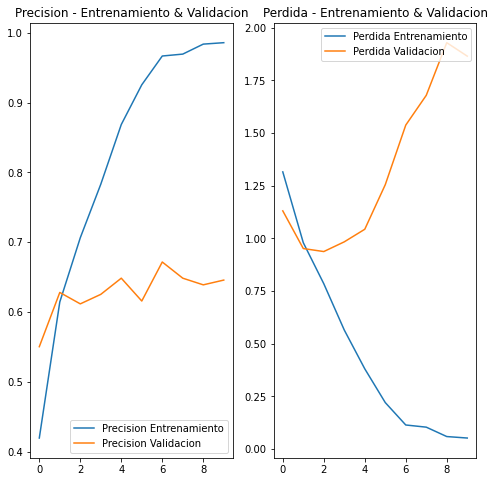

In [ ]:
precision = historial.history['accuracy']
precision_val = historial.history['val_accuracy']

perdida = historial.history['loss']
perdida_val = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, precision, label='Precision Entrenamiento')
plt.plot(rango_epocas, precision_val, label='Precision Validacion')
plt.legend(loc='lower right')
plt.title('Precision - Entrenamiento & Validacion')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, perdida, label='Perdida Entrenamiento')
plt.plot(rango_epocas, perdida_val, label='Perdida Validacion')
plt.legend(loc='upper right')
plt.title('Perdida - Entrenamiento & Validacion')
plt.show()

El modelo sufre de "sobreajuste". Se ajusta muy bien a los ejemplos de entrenamiento pero no puede predecir aquellos ejemplos de validacion que no ha visto antes. El modelo no clasificara imagenes nuevas de manera muy precisa, no poseera capacidad predictiva. Aun asi, el primer paso para poder desarrollar un modelo predictivo es, que al menos, pueda sobreajustarse, indicando que existe un patron discernible en los datos.

# Aumentacion de Datos

Para mitigar el sobreajuste, vamos a generar nuevos datos a partir de los que ya tenemos. El modelo debe predecir imagenes de flores en multiples situaciones, podemos generar nuevas situaciones que siguen conteniendo la flor de cada clase en concreto modificando el contenido de la imagen. Hay multiples formas de aumentar un conjunto de imagenes, Tensorflow ofrece una amplia gama, entre ellas, el giro horizontal, rotacion y zoom. Como ejemplo:

In [ ]:
aumentacion = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(altura_img,
                                  anchura_img,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
  ]
)

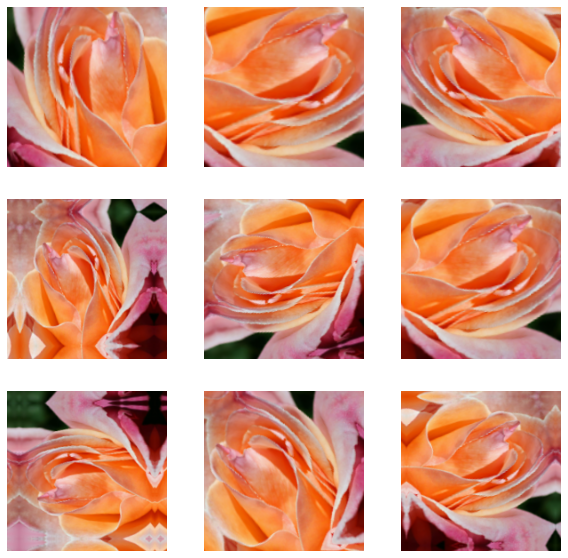

In [ ]:
plt.figure(figsize=(10, 10))
for imagenes, _ in datos_entrenamiento.take(1):
  for i in range(9):
    imagen_aumentada = aumentacion(imagenes)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imagen_aumentada[0].numpy().astype("uint8"))
    plt.axis("off")

# Abandono de Neuronas

El abandono de neuronas o dilucion de neuronas consiste en eliminar del modelo neuronas individuales de forma aleatoria para evitar que el modelo aprenda dependencias de forma demasiado intensa dando lugar a sobreajustes. Podemos añadir una capa de abandono tras cada capa de neuronas, el numero del argumento de las capas de abandono (Dropout) es la probabilidad que tiene cada neurona de ser abandonada:

In [ ]:
modelo = Sequential([
  aumentacion,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_clases)
])

Volvemos a compilar el modelo:

In [ ]:
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Entrenamos el nuevo modelo:

In [ ]:
EPOCAS = 25
historial = modelo.fit(
  datos_entrenamiento,
  validation_data=datos_validacion,
  epochs=EPOCAS
)

Epoch 1/25
92/92 [==============================] - 6s 50ms/step - loss: 1.5154 - accuracy: 0.3426 - val_loss: 1.2950 - val_accuracy: 0.4455
Epoch 2/25
92/92 [==============================] - 4s 48ms/step - loss: 1.1755 - accuracy: 0.4939 - val_loss: 1.2141 - val_accuracy: 0.5014
Epoch 3/25
92/92 [==============================] - 4s 47ms/step - loss: 1.0632 - accuracy: 0.5729 - val_loss: 1.1646 - val_accuracy: 0.5436
Epoch 4/25
92/92 [==============================] - 4s 48ms/step - loss: 0.9783 - accuracy: 0.6059 - val_loss: 0.9746 - val_accuracy: 0.6172
Epoch 5/25
92/92 [==============================] - 4s 48ms/step - loss: 0.9207 - accuracy: 0.6431 - val_loss: 0.9626 - val_accuracy: 0.6240
Epoch 6/25
92/92 [==============================] - 4s 47ms/step - loss: 0.8756 - accuracy: 0.6580 - val_loss: 0.8317 - val_accuracy: 0.6676
Epoch 7/25
92/92 [==============================] - 4s 48ms/step - loss: 0.8289 - accuracy: 0.6703 - val_loss: 0.9427 - val_accuracy: 0.6540
Epoch 8/25
92

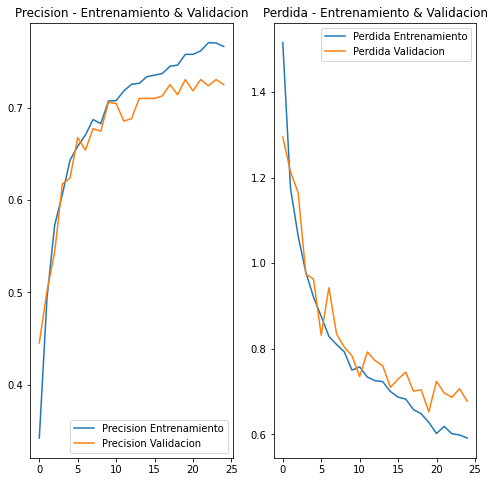

In [ ]:
precision = historial.history['accuracy']
precision_val = historial.history['val_accuracy']

perdida = historial.history['loss']
perdida_val = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, precision, label='Precision Entrenamiento')
plt.plot(rango_epocas, precision_val, label='Precision Validacion')
plt.legend(loc='lower right')
plt.title('Precision - Entrenamiento & Validacion')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, perdida, label='Perdida Entrenamiento')
plt.plot(rango_epocas, perdida_val, label='Perdida Validacion')
plt.legend(loc='upper right')
plt.title('Perdida - Entrenamiento & Validacion')
plt.show()

Finalmente usamos el modelo para predecir una imagen nunca antes vista:

In [ ]:
girasol_url = "https://st3.depositphotos.com/12985790/18885/i/1600/depositphotos_188859624-stock-photo-smiling-man-holding-bouquet-tulips.jpg"
girasol_path = tf.keras.utils.get_file('tulip_persona', origin=girasol_url)

img = tf.keras.utils.load_img(
    girasol_path, target_size=(altura_img, anchura_img)
)
img_array = tf.keras.utils.img_to_array(img)
# Creamos un lote de una sola image, el modelo predice lotes, faltaria una 
# dimension si dejamos una unica imagen con tres dimensiones (alto, ancho, color)
img_array = tf.expand_dims(img_array, 0)

prediccion = modelo.predict(img_array)
puntuacion = tf.nn.softmax(prediccion[0])

print(
    "Esta imagen es de un {} con una confianza del {:.2f} por ciento."
    .format(nombre_clases[np.argmax(puntuacion)], 100 * np.max(puntuacion))
)

180224/171945 [===============================] - 0s 1us/step
Esta imagen es de un tulips con una confianza del 45.21 por ciento.


In [ ]:
tf.nn.softmax(prediccion[0])

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.15089743, 0.16086653, 0.23551786, 0.00060379, 0.45211437],
      dtype=float32)>

In [ ]:
prediccion[0]

array([ 2.21251  ,  2.2764847,  2.6576965, -3.3086216,  3.309845 ],
      dtype=float32)

In [ ]:
nombre_clases

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']